# "Newstrace" - A method to analyze the impact of news articles on stock prices

A lot of aspects of the real world are covered by news articles, which are published online. And so this data is a valuable source to measure and analyze the impact of the real world on stock prices. There are many methods and solutions trying to squeeze out information as much as possible from this text documents, and use it for insights and predictions. 

In another post, I show how to use the service www.pinalyze.com to do the same method as in this article.

Recent advances in machine learning and natural language processing brought a bunch of new possibilities. Most of them use sentiment analysis to find positive and negative signals in the texts. A nice introduction can be found in the article https://medium.com/@chengweizhang2012/simple-stock-sentiment-analysis-with-news-data-in-keras-1478b96dd693.

Later this month the interesting post "Using the latest advancements in deep learning to predict stock price movements" 
(https://towardsdatascience.com/aifortrading-2edd6fac689d)
built a model for stock prediction using methods containing all of todays popular buzzwords as:
- Generative Adversarial Network
- Recurrent Neural Network
- Convolutional Neural Network
- Bayesian optimisation
- Deep Reinforcement learning
- stacked autoencoders
- NLP with BERT
and so on. This forms a huge "black box" of technologies trying to find signals in the data.

In contrast to this we want to develop an other method, which uses some machine leaning technics guiding a human gaining insights into the data and the market. Interactive graphics will help to understand and interpret the data. It inculdes the folloing steps:
1. We start with a published news article for which we want to analyze his possible impact on a stock price.
2. We are searching for similar news articles from the past with machine learning methods, building the so called "Newstrace".
3. Checking the similarty of the documents on the "Newstrace"
4. Get the stock data and plot the time series in the inspected timespan
5. Calculate and plot the differences of stock prices between days on the "Newstrace" and others
6. Investigate the differences with histograms and "Kernel Density Estimate" plots
7. Calculate the sigificance of the difference of means
8. Analyze the sentiment of the news documents with machine learning 
9. Interpret the results


## Start with a news article

To show the method we use an article about Amazon and the Amaton stock prices ("AMZN") as example.
The starting point of the analysis is the news article published on 18.1.2019:

### Amazon pushing hard into ocean shipping, making it easier for Chinese goods to get to you

Quietly and below the radar, Amazon has been ramping up its ocean shipping service, sending close to 4.7 million cartons of consumers goods from China to the United States over the past year, records show.

This marks a significant move into what many believe is the company’s overall strategy of eventually controlling much of its transportation network, from trucks to airplanes and now to ships.
...

https://news.yahoo.com/amazon-pushing-hard-ocean-shipping-200001052.html


## Find similar news data in the past

We have to find the most similar news article to the given article in the past 2 or 3 years. This defines the "Newstrace" on the time axis of this article. The "Newstrace" is the subset of days in the past there similar news were published.

We can use different methods and tools to find the similar news to the given article. One is to use software using machine learning methods which were trained on a large amount of news data.
For example we can use the plugin "NewsBot" for Google Chrome (https://getnewsbot.com/).

![NewsBot](newsbot.png)

But there are serveral others arround you could use for the task.

For the news about Amazon in the example we found 20 news posts and stored the information about them in a csv-file.
(You can download it from Github https://github.com/astoeckl/newstrace)

The file contains information about:
 - Publisher
 - Date
 - Title
 - Link to the article

We load the data with "Pandas" into a DataFrame:

In [1]:
import pandas as pd

df = pd.read_csv('amazon.csv', sep=';')
df['Date'] = pd.to_datetime(df['Date']).dt.date
df

,Source,Date,Titel,Link
0,Reuters,2018-07-13,Chinese imports to ports start peaking early a...,https://www.reuters.com/article/us-usa-trade-p...
1,Bloomberg,2018-05-01,Surviving Amazon and the Technology a Danish C...,https://www.bloomberg.com/news/articles/2018-0...
2,Reuters,2018-02-09,Exclusive: Amazon eyes new warehouse in Brazil...,https://www.reuters.com/article/us-amazon-braz...
3,Washington Post,2018-02-09,Analysis | Amazon's Delivery Dream Is a Nightm...,https://www.washingtonpost.com/business/amazon...
4,Investopedia,2018-02-09,Would 'Shipping with Amazon' Kill UPS and FedEx?,https://www.investopedia.com/news/would-shippi...
5,CNBC,2017-12-22,Home Depot has considered buying a $9 billion ...,https://www.cnbc.com/2017/12/22/home-depot-has...
6,CNBC,2017-10-10,Salmon fly commercial and airlines reap reward...,https://www.cnbc.com/2017/10/10/air-cargo-is-b...
7,CNBC,2017-10-06,Start-up Flexport raises $110M as Amazon pushe...,https://www.cnbc.com/2017/10/06/start-up-flexp...
8,Bloomberg,2017-09-20,Amazon Preps For a Heated Race as India's Holi...,https://www.bloomberg.com/news/articles/2017-0...
9,Reuters,2017-08-02,Freight forwarder DSV pins growth hope on e-co...,https://www.reuters.com/article/us-dsv-outlook...


## Check similarity of documents on the Newstrace

First we look at all the articles to check if they are similar enough to have a valid "Newstrace" for our further analysis. You could do this by reading all articles to check for consistency. For a quicker check we also want a numerical measure of the similarity, which we can calculate by software. 

There are different solutions you could use. In this example we use the "Dandelion" API for "Semantic Text Analytics" as a service (https://dandelion.eu).

We can check the pairewise similarity of dokuments with this API for testing text similatity.
(https://dandelion.eu/semantic-text/text-similarity-demo/)

After registering and getting an API token we call the API with 2 URLs of news articles to compare them:


In [2]:
from pandas.io.common import urlencode
import requests

url1 = 'https://news.yahoo.com/amazon-pushing-hard-ocean-shipping-200001052.html'
url2 = 'https://www.washingtonpost.com/business/amazons-delivery-dream-is-a-nightmare-for-fedex-and-ups-gadfly/2018/02/09/1cb0f0a8-0dc0-11e8-998c-96deb18cca19_story.html'

url = 'https://api.dandelion.eu/datatxt/sim/v1/?url1=' + url1 + '&url2=' + url2 + '&token=6967a80e2b07466ca210c679d11efe6f'

response = requests.get(url)
doksim = response.json()
doksim['similarity']

0.4211

We got a value of 0.4211 for this 2 documents. Now we can loop over all documents in the Newstrace and compare them with the article we are analyzing to get the values of similarity:

In [3]:
url1 = 'https://news.yahoo.com/amazon-pushing-hard-ocean-shipping-200001052.html'
sims = []
for url2 in df['Link']:
    url = 'https://api.dandelion.eu/datatxt/sim/v1/?url1=' + url1 + '&url2=' + url2 + '&token=6967a80e2b07466ca210c679d11efe6f'
    response = requests.get(url)
    doksim = response.json()
    sims.append(doksim['similarity'])
print(sims)

[0.7653, 0.3319, 0.7373, 0.4211, 0.7717, 0.7009, 0.6418, 0.6803, 0.3319, 0.7443, 0.7509, 0.7652, 0.7881, 0.7252, 0.7472, 0.8107, 0.4211, 0.7412, 0.4211, 0.3319]


With the basis of this list of similarity scores we want to define a single number measure for the quality of the whole "Newstrace". One possibility is to use the mean of the list. Others could be "Root Mean Squared Numbers" or the minimum.

In [4]:
import numpy as np

np.mean(sims)

0.6314549999999998

We got 0.631 in ths example.
This number can serve as measure of how acurate the "Newstrace" is tracking the history of the news article. 
To know which number is high enough we have to build up some experinence by manually checking the news posts and calculate the quality measure of the "Newstrace" for some more examples. 
For the purposes of the example in this post the similarity is high enough.

## Get stock data in the desired time span

In the example we use the stock prices of Anazon ("AMZN") and analyze the movement on the "Newstrace".

We download the data for Amazon ("AMZN") from www.alphavantage.co with a small Python script. (You can get an free API key from https://www.alphavantage.co/support/#api-key)

We just use the columns for volume and adjusted close price in the example, so we drop the other columns and rename them. The prices are converted to numeric data.

In [5]:
from pandas.io.common import urlencode
import requests

params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": "AMZN",
        "outputsize": "full",
        "apikey": "NC25JEGQ688IWO7X"
        # "apikey": YOUR API KEY
        }

url = "https://www.alphavantage.co/query?" + urlencode(params)
response = requests.get(url)
stock = response.json()
df_stock = pd.DataFrame(stock["Time Series (Daily)"]).transpose()

df_stock = df_stock.drop(columns=['1. open','2. high','3. low','4. close','7. dividend amount', '8. split coefficient'])
df_stock.columns = ['adjusted_close' ,'volume']
df_stock[['adjusted_close','volume']] = df_stock[['adjusted_close','volume']].apply(pd.to_numeric)
df_stock["Date"] = df_stock.index
df_stock["Date"] = pd.to_datetime(df_stock["Date"]).dt.date

df_stock.head()

,adjusted_close,volume,Date
2019-01-25,1670.57,4933150,2019-01-25
2019-01-24,1654.93,4089943,2019-01-24
2019-01-23,1640.02,5225212,2019-01-23
2019-01-22,1632.17,6416796,2019-01-22
2019-01-18,1696.20,6020503,2019-01-18


The daily changes are calculated, stored in the column "change" and rounded.

In [6]:
df_stock["change"] = df_stock["adjusted_close"].diff(periods=-1)
df_stock["change"] = df_stock["change"].round(3)
# Delete last element
df_stock = df_stock[:-1]
df_stock.head()

,adjusted_close,volume,Date,change
2019-01-25,1670.57,4933150,2019-01-25,15.64
2019-01-24,1654.93,4089943,2019-01-24,14.91
2019-01-23,1640.02,5225212,2019-01-23,7.85
2019-01-22,1632.17,6416796,2019-01-22,-64.03
2019-01-18,1696.20,6020503,2019-01-18,2.98


## Plot the time series for price

We use the Plotly library (https://plot.ly/) for displaying the stock data and to add interactivity. An introdution using Plotly can be found in the article https://towardsdatascience.com/introduction-to-interactive-time-series-visualizations-with-plotly-in-python-d3219eb7a7af


In [7]:
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Scatter(
                x=df_stock.index,
                y=df_stock['adjusted_close'],
                name = "Amazon adjusted_close")

data = [trace]

layout = dict(
    title = "Prices of Amazon",
    xaxis = dict(range = ['2016-03-17','2019-01-18'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Prices of Amazon")

The plot shows the time series of the closing price in the timespan of the news articles.

## Add the Newstrace to the plot

We mark the days where the similar news articles were published in the plot - the so called "Newstrace".

In [8]:
from datetime import datetime, timedelta

trace_change = go.Scatter(
                x=df_stock["Date"],
                y=df_stock['change'],
                name = "Amazon change")

trace_close = go.Scatter(
                x=df_stock["Date"],
                y=df_stock['adjusted_close'],
                name = "Amazon adjusted_close")

shapes = [dict(
            x0 = s,
            x1 = s + timedelta(days=1),
            y0 = 0,
            y1 = 1,
            xref= 'x',
            yref = 'paper',
            fillcolor = 'gray',
            opacity =  0.3,
            line = {'color': 'gray', 'width': 5}
            ) for (i,s) in enumerate(df["Date"])]


data = [trace_close, trace_change]


layout = dict(
    title = "Prices of Amazon",
    shapes = shapes,
    xaxis = dict(range = ['2016-03-17','2019-01-18'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Prices of Amazon")

## Show the daily changes on the newstrace

We annotate the daily changes on the days of the Newstrace and colour them red and green to get a first impression if any patterns are visible.

Before the plot the two dataframes for stock prices and news data are merged with Pandas on the "Date" columns and only one entry per day is stored.

In [10]:
dfmerge = pd.merge(df_stock, df, on = "Date" )
dfmerge.drop_duplicates(subset="Date", keep='last', inplace=True)
dfmerge.set_index('Date', inplace=True)
dfmerge

,adjusted_close,volume,change,Source,Titel,Link
Date,,,,,,
2018-07-13,1813.03,4386679,16.41,Reuters,Chinese imports to ports start peaking early a...,https://www.reuters.com/article/us-usa-trade-p...
2018-05-01,1582.26,4572071,16.13,Bloomberg,Surviving Amazon and the Technology a Danish C...,https://www.bloomberg.com/news/articles/2018-0...
2018-02-09,1339.60,13787886,-10.90,Investopedia,Would 'Shipping with Amazon' Kill UPS and FedEx?,https://www.investopedia.com/news/would-shippi...
2017-12-22,1168.36,1553997,-6.40,CNBC,Home Depot has considered buying a $9 billion ...,https://www.cnbc.com/2017/12/22/home-depot-has...
2017-10-10,987.20,3062820,-3.79,CNBC,Salmon fly commercial and airlines reap reward...,https://www.cnbc.com/2017/10/10/air-cargo-is-b...
2017-10-06,989.58,3719840,8.73,CNBC,Start-up Flexport raises $110M as Amazon pushe...,https://www.cnbc.com/2017/10/06/start-up-flexp...
2017-09-20,973.21,2727355,3.35,Bloomberg,Amazon Preps For a Heated Race as India's Holi...,https://www.bloomberg.com/news/articles/2017-0...
2017-08-02,995.89,4017780,3.62,Reuters,Freight forwarder DSV pins growth hope on e-co...,https://www.reuters.com/article/us-dsv-outlook...
2017-06-27,976.78,3735360,-17.20,Reuters,China’s latest logistics IPO is hard to unpack,https://www.reuters.com/article/us-best-inc-ip...


In the plot of the time series we add the shapes for the Newstrace as above, but with colours if the change is positive or negative on that day. The amount of the change on that day is added as annotation near the shape.

In [11]:
from datetime import datetime, timedelta

dateset= list(sorted(dfmerge.index))

changelist = []
for date in dateset:
    try:
        changelist.append(dfmerge.loc[date]['change'])
    except:
        changelist.append(0)

trace_close = go.Scatter(
                x=df_stock["Date"],
                y=df_stock['adjusted_close'],
                name = "Amazon adjusted_close")

colorlist = []
for s in changelist:
    if s > 0:
        colorlist.append('green')
    elif s == 0:
        colorlist.append('rgb(150, 150, 150)')
    else:
        colorlist.append('red')
        
shapes = [dict(
            x0 = s,
            x1 = s + timedelta(days=1),
            y0 = 0,
            y1 = 1,
            xref= 'x',
            yref = 'paper',
            opacity =  0.3,
            line = {'color': colorlist[i], 'width': 5}
            ) for (i,s) in enumerate(dateset)]


annotations =  [dict(
            x = s,
            y = (0.05 + i*0.2) % 1,
            xref = 'x',
            yref = 'paper',
            showarrow = False,
            xanchor = 'left',
            ax = 20,
            ay = -30,
            bordercolor = '#000000',
            borderwidth = 2,
            borderpad = 4,
            bgcolor = colorlist[i],
            font = {
                'family':'Courier New, monospace',
                'size':16,
                'color':'#ffffff'
            },
            opacity = 0.8,
            text =  changelist[i]
            
            ) for (i,s) in enumerate(dateset)]


data = [trace_close]


layout = dict(
    title = "Prices of Amazon",
    shapes = shapes,
    annotations = annotations,
    xaxis = dict(range = ['2016-03-17','2019-01-18']),
    yaxis = dict(title = 'Adjusted Close')
    )


fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Prices of Amazon")

From this picture it is not clear if the movement on the "Newstrace" is more up or down and if there is a pattern.

In the plot we can also see the distribution of the publication dates over the investigated time period. The dates look like random points distributed over time with almost uniform distribution. Except in the last half year there no similar news were published.

## Histograms of the daily changes

First restrict the time series to the timespan under observation.

In [13]:
startdate = datetime.strptime('2016-03-17','%Y-%m-%d').date()
enddate = datetime.strptime('2019-01-18','%Y-%m-%d').date()
dff = df_stock[(df_stock["Date"] >= startdate)  & (df_stock["Date"] <= enddate)]
dff.set_index('Date', inplace=True)

To analyze if there are differences of the daily changes we plot the histograms of the values on the "Newstrace" and on the other days. The means of this two samples are also added to the plot.

In [14]:
minx = dff['change'].min()
maxx = dff['change'].max()
binsize = (maxx-minx)/20
meana = dff['change'].mean()
meanb = dfmerge['change'].mean()

alltrace = go.Histogram(x=dff['change'], histnorm='probability',name = 'All', 
                xbins=dict(start=minx,end=maxx,size=binsize),autobinx = False)
newstrace = go.Histogram(x=dfmerge['change'], histnorm='probability',name = 'News Trace', 
                xbins=dict(start=minx,end=maxx,size=binsize),autobinx = False, opacity = 0.75)

# Mean lines
shapes = [
        dict(
            line = {'color': '#0099FF', 'dash': 'solid', 'width': 3},
            type = 'line',
            x0 = meana,
            x1 = meana,
            xref = 'x',
            y0 = -0.1,
            y1 = 1,
            yref = 'paper'
        ),
        dict(
            line = {'color': '#FDAB5A', 'dash': 'solid', 'width': 3},
            type = 'line',
            x0 = meanb,
            x1 = meanb,
            xref = 'x',
            y0 = -0.1,
            y1 = 1,
            yref = 'paper'
        )
]

# Annotations
annotations = [
        dict(
            x=meana,
            y=1.00,
            xref='x',
            yref='paper',
            text="Mean all = {:,.3f}".format(meana),
            showarrow=True,
            arrowhead=7,
            ax=1,
            ay=1
            ),
        dict(
            x=meanb,
            y=0.95,
            xref='x',
            yref='paper',
            text="Mean on newstrace = {:,.3f}".format(meanb),
            showarrow=True,
            arrowhead=7,
            ax=1,
            ay=1
            )
]
    
data = [alltrace,newstrace]
layout = dict(
    barmode = 'overlay',
    shapes = shapes,
    annotations = annotations,
    xaxis = dict(
        title = 'daily change'
    ),
    yaxis = dict(
        title = 'Normalized Frequency'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='basic histogram')

## Another possible visualization - the KDE Plot

A histogram can be thought of as a scheme in which a unit "block" is stacked above each point on a regular grid. The choice of gridding for these blocks can lead to wildly divergent ideas about the underlying shape of the density distribution. If we instead center each block on the point it represents, we get an estimation of the density distribution. This is called kernel density estimation with a "top hat" kernel. This idea can be generalized to other kernel shapes, for example Gaussian kernel density estimate.(https://en.wikipedia.org/wiki/Kernel_density_estimation)

We use Gaussian kernel density estimate in the example:

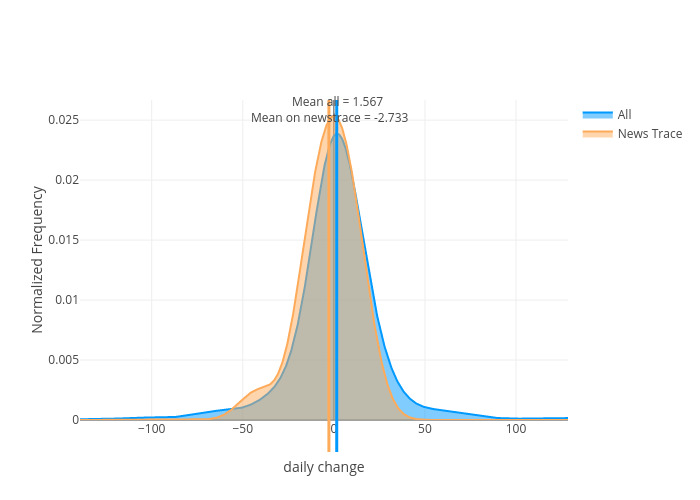

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

import numpy as np
from sklearn.neighbors import KernelDensity

X = dff['change'][:, np.newaxis]
X_plot = np.linspace(minx, maxx, 1000)[:, np.newaxis]

X1 = dfmerge['change'][:, np.newaxis]
X1_plot = np.linspace(minx, maxx, 1000)[:, np.newaxis]

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(X)
log_dens = kde.score_samples(X_plot)

kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(X1)
log_dens1 = kde.score_samples(X1_plot)


# Mean lines
shapes = [
        dict(
            line = {'color': '#0099FF', 'dash': 'solid', 'width': 3},
            type = 'line',
            x0 = meana,
            x1 = meana,
            xref = 'x',
            y0 = -0.1,
            y1 = 1,
            yref = 'paper'
        ),
        dict(
            line = {'color': '#FDAB5A', 'dash': 'solid', 'width': 3},
            type = 'line',
            x0 = meanb,
            x1 = meanb,
            xref = 'x',
            y0 = -0.1,
            y1 = 1,
            yref = 'paper'
        )
]

# Annotations
annotations = [
        dict(
            x=meana,
            y=1.00,
            xref='x',
            yref='paper',
            text="Mean all = {:,.3f}".format(meana),
            showarrow=True,
            arrowhead=7,
            ax=1,
            ay=1
            ),
        dict(
            x=meanb,
            y=0.95,
            xref='x',
            yref='paper',
            text="Mean on newstrace = {:,.3f}".format(meanb),
            showarrow=True,
            arrowhead=7,
            ax=1,
            ay=1
            )
]

trace1 = go.Scatter(x=X_plot[:, 0], y=np.exp(log_dens), mode='lines', fill='tozeroy', 
                    line=dict(color='#0099FF', width=2), name = 'All',)

trace2 = go.Scatter(x=X1_plot[:, 0], y=np.exp(log_dens1), mode='lines', fill='tozeroy', 
                    line=dict(color='#FDAB5A', width=2), name = 'News Trace',)

data = [trace1,trace2]

layout = dict(
    shapes = shapes,
    annotations = annotations,
    xaxis = dict(
        title = 'daily change'
    ),
    yaxis = dict(
        title = 'Normalized Frequency'
    ),
)

fig = dict(data=data, layout=layout)
py.image.ishow(fig)

## Test the differences of means

The distributions and means in the pictures of the histogram and the KDE plot show only a small difference of the stock price movement on the "Newstrace" and beside. We want test now if this difference of the values is significant different from zero.

First select the two sets of days, on and beside the "Newstrace"

In [124]:
setall = list(dff.index)
setrest = set(setall) - set(dateset)

Calculate the Student T-test statistic (https://en.wikipedia.org/wiki/Student%27s_t-test) for the two samples of daily price changes:

In [127]:
from scipy import stats

b = list(dff.loc[dateset]["change"])
a = list(dff.loc[setrest]["change"])

_, p2 = stats.ttest_ind(a,b,equal_var = True)

p2

0.45727870289048655

This high p-value shows that the hypothesis that the difference of the two samples come from random can not be rejected.
So as the histogram and the density plot suggest, there is no significant difference. The analysis of the news article does not show an impact on the stock price of Amazon.

In a future post we will show an example that suggest an impact from the "Newstrace" on the price movement of some stocks.

## Sentiment analysis of the news

Studies showed that the sentiment of news articles has an impact on stock prices. So we want to add as additional information the sentiment for each article on the "Newstrace" and start an analysis with this data. Machine learning will be used to calculate a measure for the sentiment of a text document.

This will also be covered in a future article.